# Employee Turnover Prediction

## Table of contents
* 🔍 The problem 
* 📚 Importing libraries
* 📒 The dataset
* 🔬 Preprocessing
* 📈 Descriptive Statistics
* 📊 Exploratory data analysis (EDA)


### The problem 

Employees turnover costs are a significate concern for businesses worldwide. The average annual turnover rate in the U.S is 47% and replacing an employee costs up to 2 times of their annual salary. There are many factors that could lead to turnover like low pay or toxic work environment.However, 56% of job seekers value company culture over salary (https://builtin.com/recruiting/employee-turnover-statistics)

This is why it's important to predict employee turnover and know the factors that lead to it to prevent it.


In [260]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.ticker as mtick
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [261]:
df = pd.read_csv("IBM-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Preprocessing

In [262]:
#Identifying columns with only 1 unique value 
unique_counts = df.nunique()
single_value_columns = unique_counts[unique_counts==1]
print(single_value_columns)

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64


In [263]:
#dropping columns with only 1 unique value 
df.drop(columns=['EmployeeCount','Over18','StandardHours'],inplace=True)

In [264]:
#dropping unneccessary columns or columns I don't understand their prupose or their values
df.drop(columns=['DailyRate','HourlyRate','MonthlyRate','EmployeeNumber','StockOptionLevel'],inplace=True)



In [265]:
#Changing Yes and No from Attrition column to 1 and 0
df['Attrition'] = df['Attrition'].map({"Yes":1,"No":0})

### Descriptive Statistics

In [266]:
#Summary Statistics
df.describe()
# There doesn't seem to be any outliers

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [267]:
# No null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

### Explarotary Data Analysis(EDA)

#### Lets first set the questions that we want to answer
- Is there a difference between females and males turnover rate?
- Which variables have the highest impact on the turnover?
- 


Text(0, 0.5, 'Count')

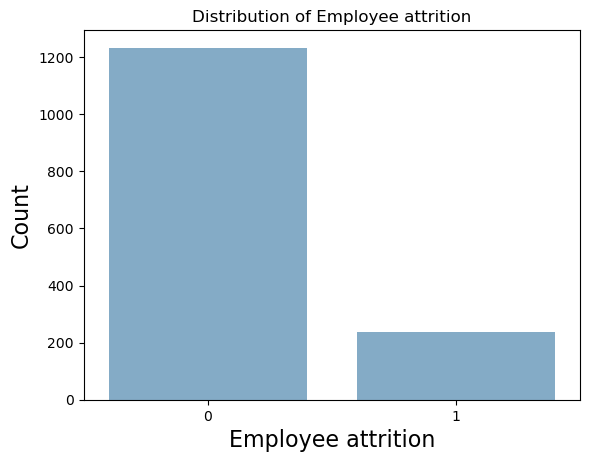

In [268]:
#Distribution of Employees attrition in the dataset

attrition = df['Attrition'].value_counts()
sns.barplot(y=attrition.values, x=attrition.index, alpha=0.6)
plt.title('Distribution of Employee attrition')
plt.xlabel('Employee attrition', fontsize=16)
plt.ylabel('Count', fontsize=16)

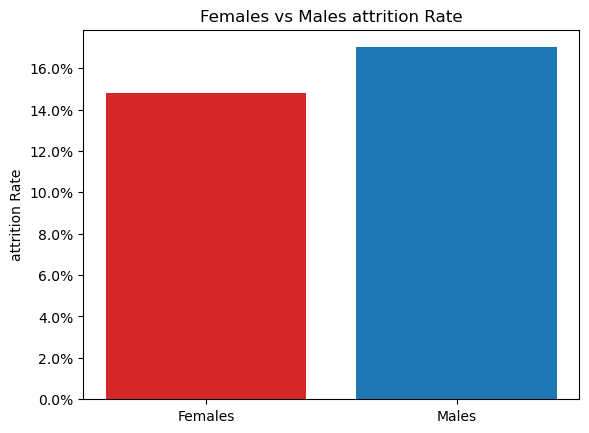

In [269]:
male_attrition_rate = df[df['Gender'] == 'Male']['Attrition'].value_counts()[1]/df[df['Gender'] == 'Male'].shape[0] *100
female_attrition_rate = df[df['Gender'] == 'Female']['Attrition'].value_counts()[1]/df[df['Gender'] == 'Female'].shape[0]*100
fig, axes = plt.subplots()
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

axes.bar(['Females','Males'], [female_attrition_rate,male_attrition_rate], label=bar_labels, color=bar_colors)

axes.set_ylabel('attrition Rate')
axes.set_title('Females vs Males attrition Rate')
axes.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

<Axes: xlabel='Age', ylabel='Count'>

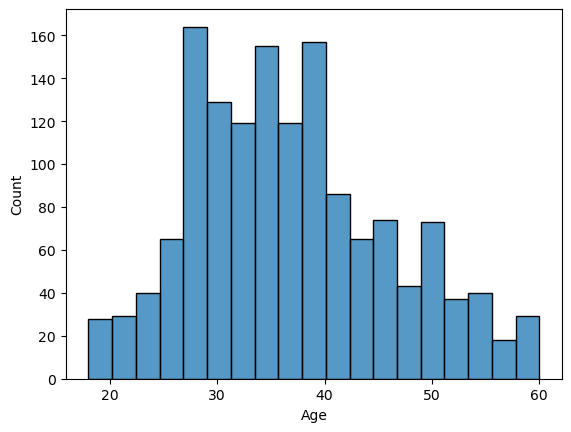

In [270]:

#Age Distribution
sns.histplot(data=df['Age'])

In [271]:
corr = df.corr(numeric_only=True)

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

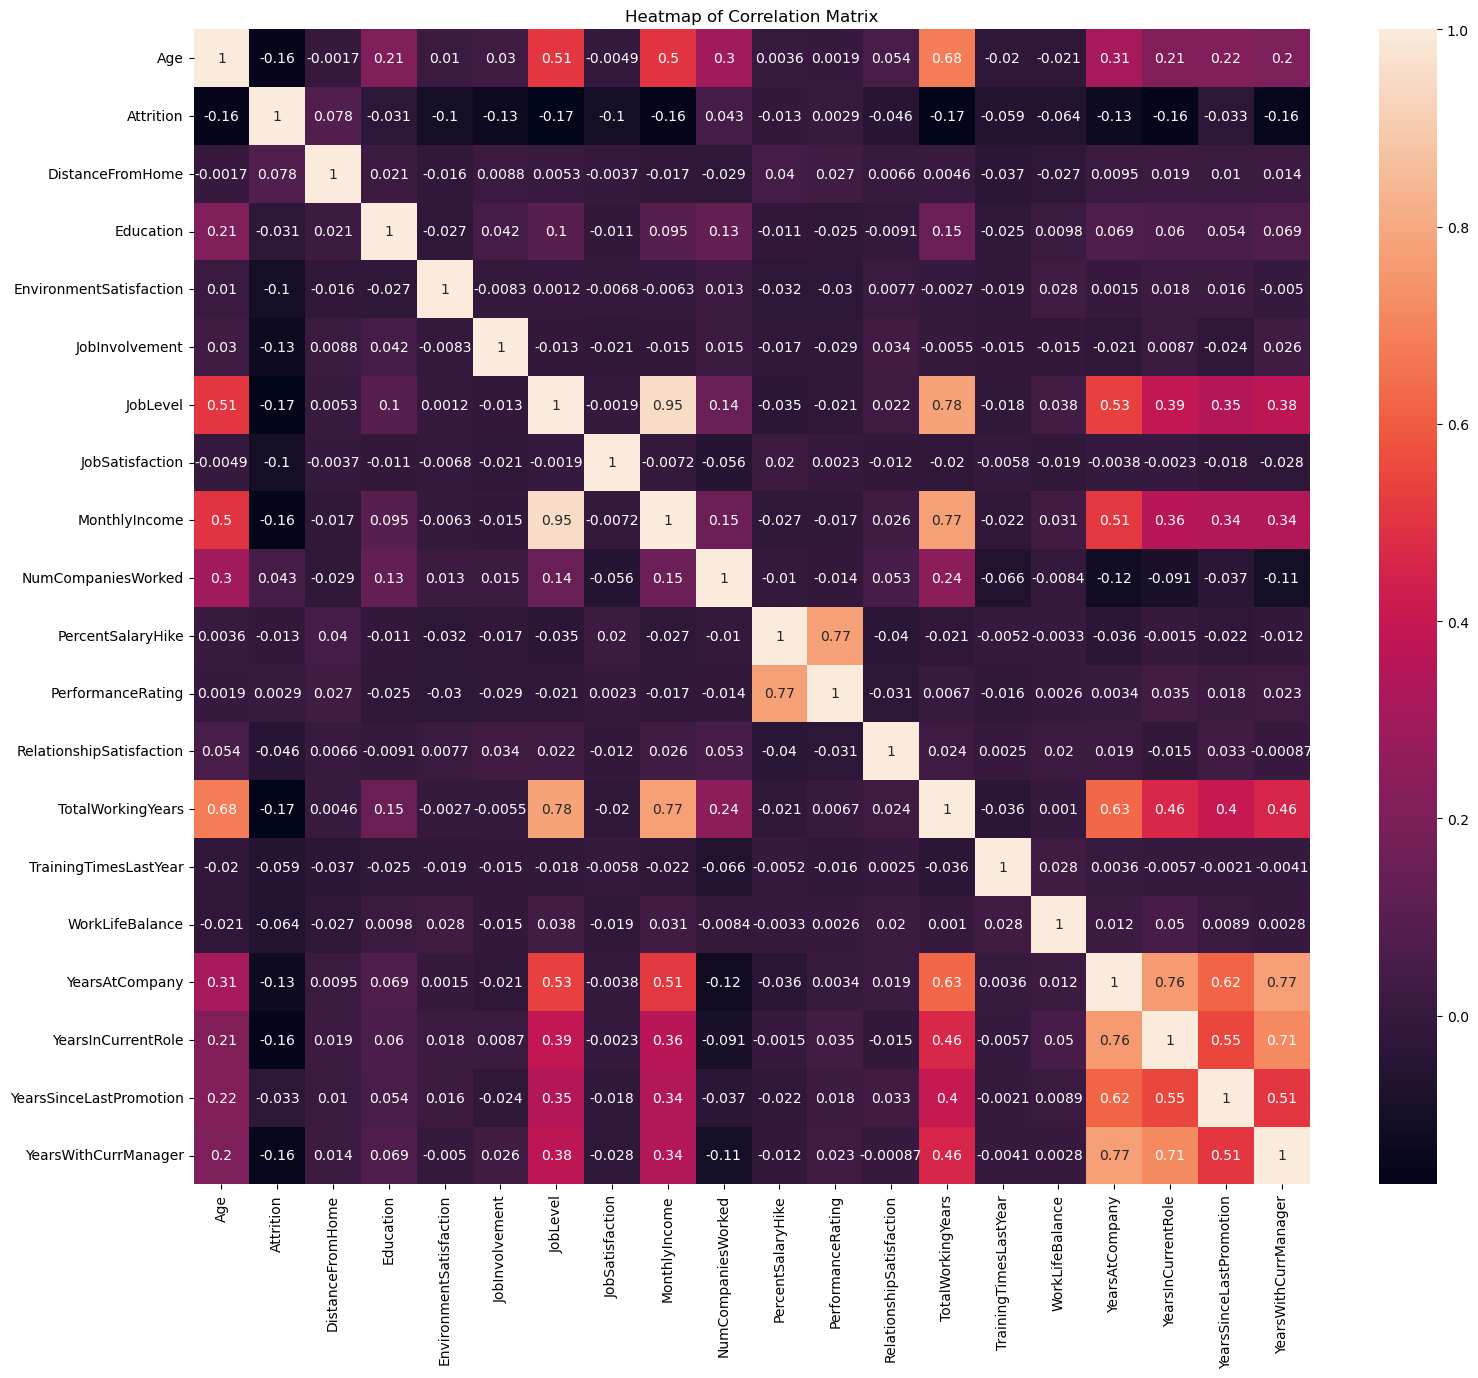

In [272]:
# correlation matrix - DistanceFromHome have the highest impact followed by Number fo companies worked on 
plt.figure(figsize=(18,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.title('Heatmap of Correlation Matrix')

Text(0, 0.5, 'Employee Count')

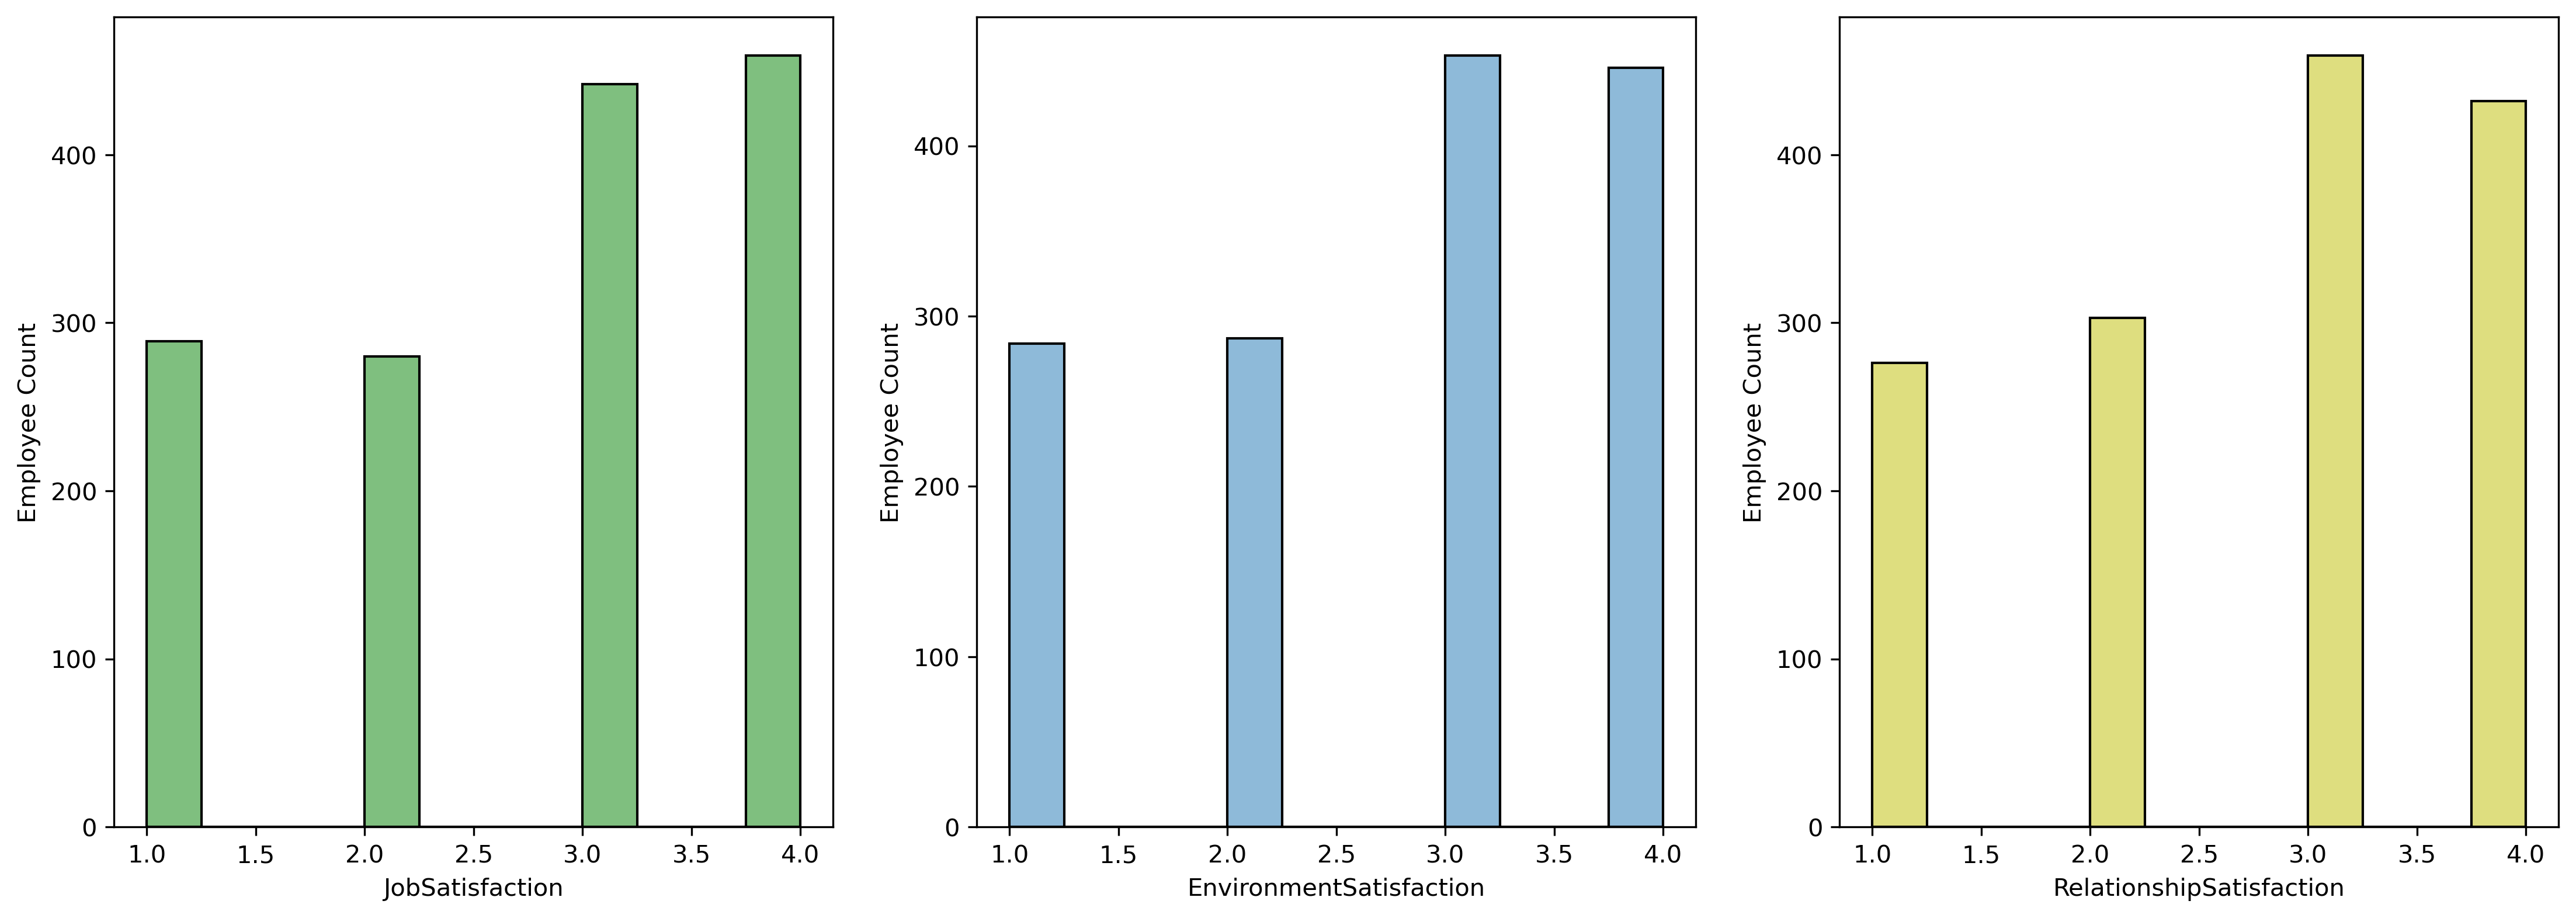

In [273]:
#Satisfaction Distribution
fig, axes = plt.subplots(ncols=3,figsize=(18, 6), dpi=300)
js = sns.histplot(data=df['JobSatisfaction'],ax=axes[0],color='g',alpha =0.5)
js.set_ylabel("Employee Count")
es = sns.histplot(data=df['EnvironmentSatisfaction'],ax=axes[1],alpha =0.5)
es.set_ylabel("Employee Count")
rs = sns.histplot(data=df['RelationshipSatisfaction'],ax=axes[2],color='y',alpha =0.5)
rs.set_ylabel("Employee Count")


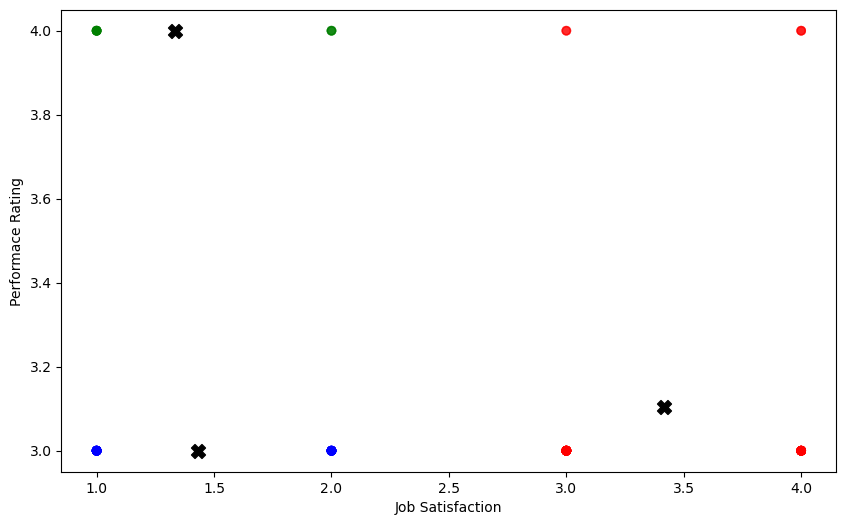

In [274]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(df[df['Attrition'] == 1][['JobSatisfaction','PerformanceRating']])
fig = plt.figure(figsize=(10, 6))
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_]
plt.scatter(x="JobSatisfaction",y="PerformanceRating", data=df[df['Attrition'] == 1],
            alpha=0.25,color = kmeans_colors)

plt.xlabel("Job Satisfaction")
plt.ylabel("Performace Rating")

plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)



In [275]:
numerical_df = df.select_dtypes(include='int64')
categorical_df = df.select_dtypes(exclude='int64')
categorical_df = pd.get_dummies(categorical_df,drop_first=True,dtype=int)
new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,11,3,1,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,23,4,4,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,15,3,2,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,11,3,3,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,12,3,4,6,3,3,2,2,2,2


In [276]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [277]:

X = new_df[new_df.columns.difference(['Attrition'])]
y = new_df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [278]:
round(df['Attrition'].value_counts(1), 2)

Attrition
0    0.84
1    0.16
Name: proportion, dtype: float64

In [279]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)
X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsample using SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))

In [280]:
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (1176, 40) (1176,)
Upsampled shape: (1972, 40) (1972,)
SMOTE sample shape: (1972, 40) (1972,)
Downsampled shape: (380, 40) (380,)


In [281]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [282]:
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "Downsampled": (X_train_d, y_train_d),
                "SMOTE":(x_train_sm, y_train_sm)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), 
                                 methods_data[method][0], 
                                 methods_data[method][1], 
                                 cv=5, 
                                 scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())

The best F1 Score for Original data:
0.12563987225046108
The best F1 Score for Upsampled data:
0.678009689878708
The best F1 Score for Downsampled data:
0.684206899653146
The best F1 Score for SMOTE data:
0.7304355302399925


In [283]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

In [284]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

0.7304355302399925

In [285]:
print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))

print ("Logistic Regression AUC = %2.2f" % lr_auc)

lr2 = lr.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.61
              precision    recall  f1-score   support

           0       0.88      0.71      0.79       247
           1       0.25      0.51      0.34        47

    accuracy                           0.68       294
   macro avg       0.57      0.61      0.56       294
weighted avg       0.78      0.68      0.71       294



In [286]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()
rf = rf.fit(x_train_sm, y_train_sm)
rf

RandomForestClassifier()

In [287]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.8921259090423479

In [288]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.57
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       247
           1       0.37      0.21      0.27        47

    accuracy                           0.82       294
   macro avg       0.62      0.57      0.58       294
weighted avg       0.78      0.82      0.80       294



In [289]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

In [290]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

0.8520256254684131

In [291]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.64
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       247
           1       0.47      0.36      0.41        47

    accuracy                           0.83       294
   macro avg       0.68      0.64      0.66       294
weighted avg       0.82      0.83      0.82       294



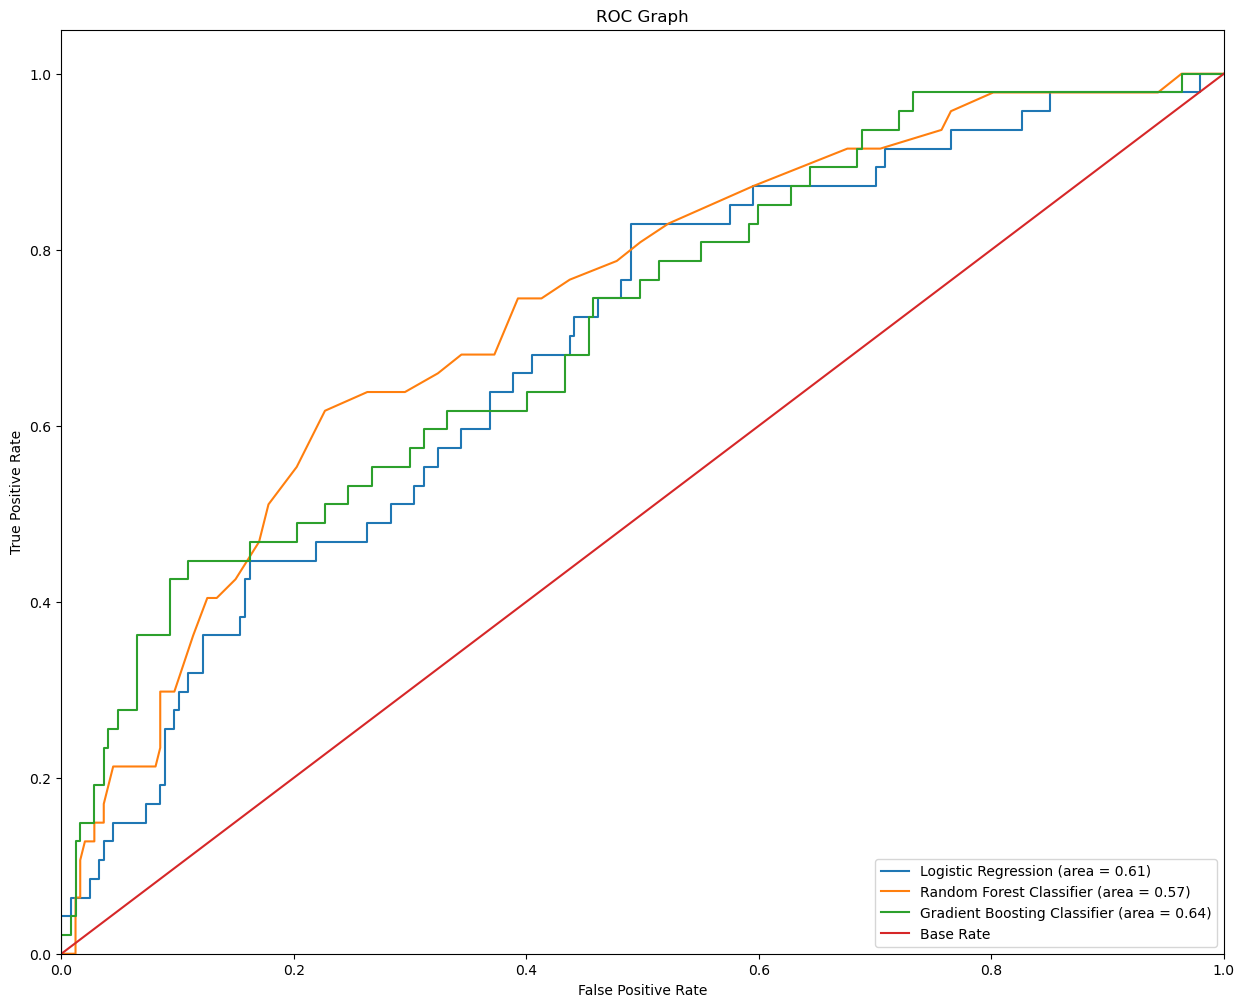

In [292]:
# Create ROC Graph
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure(figsize=(15,12))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")


In [293]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = x_train_sm.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,MonthlyIncome,0.075448
1,MaritalStatus_Married,0.059452
2,EnvironmentSatisfaction,0.058770
3,Age,0.052622
4,JobSatisfaction,0.047667
5,YearsWithCurrManager,0.046329
6,DistanceFromHome,0.043291
7,YearsAtCompany,0.042989
8,TotalWorkingYears,0.042059
9,YearsInCurrentRole,0.040970


In [294]:
import pickle as pk

In [295]:
pk.dump(rf, open("random-forest-attrition.pkl", "wb"))

In [296]:
model_rf = pk.load(open("random-forest-attrition.pkl", "rb"))

# Now, to make use of the model as you normally would

new_data = X[0:20]

turnover_prediction = model_rf.predict_proba(new_data)
print(turnover_prediction)


[[0.21 0.79]
 [0.94 0.06]
 [0.58 0.42]
 [0.71 0.29]
 [0.8  0.2 ]
 [0.94 0.06]
 [0.81 0.19]
 [0.72 0.28]
 [0.96 0.04]
 [0.96 0.04]
 [0.73 0.27]
 [0.99 0.01]
 [0.95 0.05]
 [0.9  0.1 ]
 [0.11 0.89]
 [0.89 0.11]
 [0.71 0.29]
 [0.35 0.65]
 [0.92 0.08]
 [0.95 0.05]]
